<a href="https://colab.research.google.com/github/Mario-Corrente/paper_unibo/blob/main/1_Rinizio_progetto_Poggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto del corso - Laboratorio di Programmazione - a.a. 2023/2024

# Membri del gruppo numero-gruppo

Il gruppo numero-gruppo è composto da (modificare con i propri dati):

*   **Mario Corrente:** 1115946, e-mail: mario.corrente@studio.unibo.it
*   **Martina Orrù:** 1118772, e-mail martina.orru@studio.unibo.it


# Materiale del progetto

Il materiale del progetto è disponibile sul sito del corso e contiene:

* *1.train_non_convertito.csv* e *1.test_non_convertito.csv:* sono rispettivamente il training dataset ed il test dataset. Contengono valori non numerici e possono essere utilizzati per realizzare le fasi 1 e 2 del progetto  
* *1.dataset_descrizione.txt:* un file di testo con la descrizione delle variabili (le colonne) dei dataset precedenti
* *1.train_convertito.csv* e *1.test_convertito.csv:* sono rispettivamente il training dataset ed il test dataset. I valori non numerici presenti nei precedenti due dataset sono stati convertiti in valori numerici, e quindi possono essere realizzato per realizzare la fase 3 del progetto
* *1.dataset_schema_conversione_fase3.txt:* descrizione dello schema usato per convertire i dateset nelle versioni contenenti solo valori numerici
* *LabProgrammazione_23-24_09.pdf:* le dispense con le specifiche di questo progetto

**Attenzione:** rinominare il notebook prima della consegna inserendo il numero del proprio gruppo in 'Progetto_LabProg_gruppo_n.ipynb'.

# Preparazione dell'ambiente

Per iniziare procediamo subito ad importare tutte le librerie necessarie di Python.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *

# Fase 1

***ABSTRACT***

### ABSTRACT

Nel presente progetto si procede ad esplorare e analizzare i dati presenti in un dataset, con l'obiettivo di creare un modello previsionale che sia in grado di predire un attacco cardiaco. \
Il dataset contiene varie informazioni come il genere del soggetto, l'età, se soffre di ipertensione, di malattie cardiache, i livelli medi di glucosio nel sangue e il BMI (Indice di massa corporea - Body Mass Index). \
***LA FASE 1*** È incentrata alla descrizione del dataset, fornendo al lettore le informazioni principali alle quali tener conto nel resto dell'analisi. Verranno esplorate quindi le statistiche principali del dataset, quali medie, mediane e deviazioni standard.\
***FASE 2*** È interamente dedicata all'analisi del dataset. È composta da una serie di grafici relazionali che mettono in evidenza le varie dipendenze delle variabili presenti nel dataset.\
Si portano all'attenzione del lettore tutte le relazioni necessarie per cercare di comprendere la dipendenza di alcune variabili da altre. \
***FASE 3*** Si concentrerà sulla parte di Machine Learning. Verranno preparati entrambi i dataset, train e test, per creare il modello di machine learning adatto per la previsione. \
Verranno esposti i risultati dei modelli e verranno messi a confronto per vedere quale dei due è più preciso e affidabile. \
***CONCLUSIONI*** Questa sezione riporterà le conclusioni alle quali siamo giunti dopo il lavoro e un report dettagliato su quanto emerso durante lo studio del dataset.


******

Carichiamo i dataset per iniziare le prime analisi.

## INTRODUZIONE

Il presente elaborato esplora le possibili relazioni che intercorrono tra le variabili all'interno del Dataset. Abbiamo un dataset che contiene i dati di pazienti che sono stati colpiti o meno da 'stroke' (infarto), correlati con altre variabili che potrebbero essere rilevanti nello studio previsionale di un possibile attacco di 'stroke'. \

In [5]:
train_nc = pd.read_csv("sample_data/2.train_non_convertito.csv", sep = ",")
test_nc = pd.read_csv("sample_data/2.test_non_convertito.csv", sep = ",")
train_nc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44243,Female,29.0,0,0,No,Private,Rural,78.88,26.1,never smoked,0
1,6172,Female,79.0,0,0,Yes,Private,Rural,208.05,NaN,smokes,0
2,55680,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
3,24272,Male,63.0,0,0,Yes,Govt_job,Rural,217.66,28.7,formerly smoked,0
4,56584,Female,22.0,0,0,No,Private,Rural,62.00,32.7,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4074,12911,Female,51.0,0,0,Yes,Private,Rural,81.73,27.4,never smoked,0
4075,34965,Female,18.0,0,0,No,Private,Urban,95.87,23.0,never smoked,0
4076,37307,Female,35.0,0,0,Yes,Private,Urban,65.48,50.5,never smoked,0
4077,10552,Female,81.0,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1


In [6]:
num_righe = train_nc.shape[0]
num_colonne = train_nc.shape[1]
print("Numero righe", num_righe)
print("Numero colonne", num_colonne)

Numero righe 4079
Numero colonne 12


Andiamo subito a capire com'è strutturato il dataset.
Da una primissima analisi vediamo che è composto da 4079 righe per 12 colonne.

Abbiamo diversi valori categorici:
*   Il genere
*   Ipertensione
*   Malattie cardiache
*   Se sono mai stati sposati
*   Tipo di residenza
*   Attacco cardiaco

Mentre abbiamo altri valori non categorici:
*   Età
*   Livelli medi di glucosio nel sangue
*   BMI Indice di Massa Corporea



Procederei come secondo step a capire se il dataset presenta dei valori nulli.

In [7]:
print(train_nc.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  152
smoking_status         0
stroke                 0
dtype: int64


Vediamo che il dataset è quasi completo, ad eccezione dei livelli di BMI che presentano diversi valori nulli, 159. Va tenuto conto che 159 valori su 4079 potrebbero anche non essere influenti sul totale.

In [8]:
for i in train_nc.columns:
    null_count = train_nc[i].isnull().sum()
    print("La colonna '" + str(i) + "' ha " + str(null_count) + " valori nulli.")


La colonna 'id' ha 0 valori nulli.
La colonna 'gender' ha 0 valori nulli.
La colonna 'age' ha 0 valori nulli.
La colonna 'hypertension' ha 0 valori nulli.
La colonna 'heart_disease' ha 0 valori nulli.
La colonna 'ever_married' ha 0 valori nulli.
La colonna 'work_type' ha 0 valori nulli.
La colonna 'Residence_type' ha 0 valori nulli.
La colonna 'avg_glucose_level' ha 0 valori nulli.
La colonna 'bmi' ha 152 valori nulli.
La colonna 'smoking_status' ha 0 valori nulli.
La colonna 'stroke' ha 0 valori nulli.


In [14]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
print(train_nc.describe())
#test_nc.describe()


            id     age  hypertension  heart_disease  avg_glucose_level  \
count  4079.00 4079.00       4079.00        4079.00            4079.00   
mean  36609.62   43.30          0.10           0.05             105.66   
std   21076.16   22.63          0.30           0.23              45.04   
min      67.00    0.08          0.00           0.00              55.12   
25%   17950.50   25.00          0.00           0.00              76.88   
50%   37192.00   45.00          0.00           0.00              91.53   
75%   54511.50   61.00          0.00           0.00             113.65   
max   72940.00   82.00          1.00           1.00             271.74   

          bmi  stroke  
count 4079.00 4079.00  
mean    28.93    0.05  
std      7.72    0.21  
min     10.30    0.00  
25%     23.90    0.00  
50%     28.10    0.00  
75%     32.90    0.00  
max     97.60    1.00  


Dalla descrizione del Dataset possiamo iniziare ad ottenere le prime informazioni utili alla presentazione.
* Abbiamo una media età di circa 43 anni. Da un minimo di poco meno di un anno fino ad un massimo di 82 anni.
* La media dei livelli di glocosio nel sangue è di 105,66 (leggermente più alto del valore massimo accetabile per il livello di glucosio che dovrebbe attestarsi massimo a 100). Da un minimo di 55,12 fino al massimo di 271,74.
* Il valore medio di BMI è di 28,96. Da un minimo di 10,30 fino al massimo di 97.60. Ricordiamo che il valore BMI è un valore da prendere in considerazione con molta attenzione, dato che non è un valore che dimostra effettivamente se una persona potrebbe risultare obesa o meno.


In [10]:
print(train_nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4079 non-null   int64  
 1   gender             4079 non-null   object 
 2   age                4079 non-null   float64
 3   hypertension       4079 non-null   int64  
 4   heart_disease      4079 non-null   int64  
 5   ever_married       4079 non-null   object 
 6   work_type          4079 non-null   object 
 7   Residence_type     4079 non-null   object 
 8   avg_glucose_level  4079 non-null   float64
 9   bmi                3927 non-null   float64
 10  smoking_status     4079 non-null   object 
 11  stroke             4079 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 382.5+ KB
None


Nel csv di train vediamo che sono tutti valori completi ad eccezione del BMI che presenta alcuni valori nulli

In [15]:
genders = {"Male": 0, "Female": 1}
train_nc["gender"] = train_nc["gender"].map(genders)
test_nc["gender"] = test_nc["gender"].map(genders)

Per effettuare una comparazione tra stroke e gender abbiamo dovuto necessariamente mappare come numerici i valori espressi in lettere.

In [16]:
print("Il raggruppamento per genere e stroke è: \n  0 = maschi e 1 = femmine \n", train_nc.groupby("gender")["stroke"].mean())
maschi = (train_nc["gender"] == 0).sum()
femmine = (train_nc["gender"] == 1).sum()
print("Il numero totale di maschi è: \n ", maschi)
print("Il numero totale di femmine è: \n",femmine)

Il raggruppamento per genere e stroke è: 
  0 = maschi e 1 = femmine 
 gender
0.00   0.05
1.00   0.04
Name: stroke, dtype: float64
Il numero totale di maschi è: 
  1696
Il numero totale di femmine è: 
 2382


Da questo approfondimento vediamo che la percentuale di "stroke" é:
* 5% per i soggetti di genere maschile.
* 4% per i soggetti di genere femminile.

Vediamo subito che la media di stroke per i maschi è leggermente più alta della media stroke per le femmine, tenendo anche conto del fatto che i maschi sono più numerosi nel dataset, quindi il primo valore da prendere in considerazione è il sesso, essendo i maschi evidentemente più predisposti.

In [17]:
print("Il raggruppamento per genere e stroke è: \n  0 = maschi e 1 = femmine \n", test_nc.groupby("gender")["stroke"].mean())
maschi = (test_nc["gender"] == 0).sum()
femmine = (test_nc["gender"] == 1).sum()
print("Il numero totale di maschi è: \n ", maschi)
print("Il numero totale di femmine è: \n",femmine)

Il raggruppamento per genere e stroke è: 
  0 = maschi e 1 = femmine 
 gender
0   0.05
1   0.06
Name: stroke, dtype: float64
Il numero totale di maschi è: 
  419
Il numero totale di femmine è: 
 612


A questo punto procediamo a rimuovere le colonne che non riteniamo necessarie o importanti per l'analisi, come id, mai stato sposato, il tipo di lavoro (essendo troppo generico come dato per avere delle comparazioni) e il tipo di residenza. Lasciamo tutti gli altri valori che crediamo siano utili per un'analisi di questo tipo.

In [20]:
train_nc.drop(["id", "ever_married", "work_type", "Residence_type"], axis=1, inplace=True)

Rimuovo queste colonne perché non le ritengo necessarie e discriminanti per il tipo di analisi che vogliamo compiere.

Ritrovandoci così con un dataset abbastanza chiaro e ripulito.

In [21]:
print("La descrizione del train non convertito è: ")
train_nc.describe()

La descrizione del train non convertito è: 


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4078.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00
mean,0.58,43.30,0.10,0.05,105.66,28.93,0.05
std,0.49,22.63,0.30,0.23,45.04,7.72,0.21
min,0.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,0.00,25.00,0.00,0.00,76.88,23.90,0.00
50%,1.00,45.00,0.00,0.00,91.53,28.10,0.00
75%,1.00,61.00,0.00,0.00,113.65,32.90,0.00
max,1.00,82.00,1.00,1.00,271.74,97.60,1.00


A questo punto abbiamo il dataset con le sole colonne che riteniamo utili nello studio.

In [22]:
conteggio = (train_nc.groupby("gender").count())
media = (train_nc.groupby("gender")["bmi"].mean())

print("Il conteggio dei soggetti è: ")
print(conteggio)
print("La media dei valori è: ")
print(media)

Il conteggio dei soggetti è: 
         age  hypertension  heart_disease  avg_glucose_level   bmi  \
gender                                                               
0.00    1696          1696           1696               1696  1696   
1.00    2382          2382           2382               2382  2382   

        smoking_status  stroke  
gender                          
0.00              1696    1696  
1.00              2382    2382  
La media dei valori è: 
gender
0.00   28.77
1.00   29.05
Name: bmi, dtype: float64


In base a questi valori vediamo che il livello medio di glucosio nel sangue è leggermente più alto nelle donne che negli uomini.

In [23]:
mediana_bmi = train_nc['bmi'].median()
print("Il valore della mediana dei livelli di BMI è: ", mediana_bmi)

Il valore della mediana dei livelli di BMI è:  28.1


Fatte le primissime analisi procediamo a sostituire i valori nulli che si trovano nella colonna bmi per avere un set completo. I valori nulli verranno sostituiti con il valore della mediana per evitare di incorrere in problemi di valutazione della media, anche se, stando ai dati non sembrano esserci apparenti valori outlier che siano in grado di falsificare il valore della media.

In [24]:
for nulli, valore_bmi in train_nc["bmi"].items():
  if pd.isnull(valore_bmi):
    train_nc.at[nulli, "bmi"] = 28.1

In [25]:
print(train_nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4078 non-null   float64
 1   age                4079 non-null   float64
 2   hypertension       4079 non-null   int64  
 3   heart_disease      4079 non-null   int64  
 4   avg_glucose_level  4079 non-null   float64
 5   bmi                4079 non-null   float64
 6   smoking_status     4079 non-null   object 
 7   stroke             4079 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 255.1+ KB
None


Adesso abbiamo un dataset completo e senza valori nulli. A questo punto possiamo iniziare a verificare le varie relazioni che ci sono tra le variabili nel dataset.

In [26]:
percentuali_train = train_nc['stroke'].value_counts(normalize=True)
percentuali_test = test_nc['stroke'].value_counts(normalize=True)
print("Proporzioni di stroke nel training dataset:")
print(percentuali_train)
print("\nProporzioni di stroke nel test dataset:")
print(percentuali_test)

Proporzioni di stroke nel training dataset:
0   0.95
1   0.05
Name: stroke, dtype: float64

Proporzioni di stroke nel test dataset:
0   0.94
1   0.06
Name: stroke, dtype: float64


Come vediamo, nel dataset train abbiamo:
* 95% dei soggetti non colpiti da 'stroke'.
* 5% dei soggetti colpiti da 'stroke'

Nel dataset di test invece:
* 94% dei soggetti non colpiti da 'stroke'
* 6% dei soggetti colpiti da 'stroke'

# Fase 2

INIZIAMO A VALUTARE I FILE E CERCARE DELLE CORRELAZIONI TRA I VALORI PRESENTI.

Filtriamo, dunque, le colonne che ci interessano per valutare relazioni. Assegnamo delle nuove variabili per creare delle colonne relazionali.

## Preparazione variabili relazionali

In [27]:
colonne_rel1 = train_nc[["gender", "avg_glucose_level", "age"]]
colonne_rel1

,gender,avg_glucose_level,age
0,1.00,78.88,29.00
1,1.00,208.05,79.00
2,0.00,114.84,13.00
3,0.00,217.66,63.00
4,1.00,62.00,22.00
...,...,...,...
4074,1.00,81.73,51.00
4075,1.00,95.87,18.00
4076,1.00,65.48,35.00
4077,1.00,81.95,81.00


In [28]:
colonne_rel2 = test_nc[["gender", "avg_glucose_level", "age"]]
colonne_rel2

,gender,avg_glucose_level,age
0,1,99.36,47.00
1,1,108.80,32.00
2,1,91.90,43.00
3,1,77.29,20.00
4,1,103.78,44.00
...,...,...,...
1026,1,95.94,74.00
1027,1,109.81,4.00
1028,0,90.44,47.00
1029,1,88.11,0.88


In [29]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
colonne_rel3

,bmi,avg_glucose_level,age,hypertension,stroke
0,26.10,78.88,29.00,0,0
1,28.10,208.05,79.00,0,0
2,18.30,114.84,13.00,0,0
3,28.70,217.66,63.00,0,0
4,32.70,62.00,22.00,0,0
...,...,...,...,...,...
4074,27.40,81.73,51.00,0,0
4075,23.00,95.87,18.00,0,0
4076,50.50,65.48,35.00,0,0
4077,16.90,81.95,81.00,0,1


In [30]:
colonne_rel4 = train_nc[["gender", "bmi", "avg_glucose_level", "stroke"]]
colonne_rel4

,gender,bmi,avg_glucose_level,stroke
0,1.00,26.10,78.88,0
1,1.00,28.10,208.05,0
2,0.00,18.30,114.84,0
3,0.00,28.70,217.66,0
4,1.00,32.70,62.00,0
...,...,...,...,...
4074,1.00,27.40,81.73,0
4075,1.00,23.00,95.87,0
4076,1.00,50.50,65.48,0
4077,1.00,16.90,81.95,1


In [31]:
for col in train_nc.columns:
    null_count = train_nc[col].isnull().sum()
    print("La colonna '" + str(col) + "' ha " + str(null_count) + " valori nulli.")


La colonna 'gender' ha 1 valori nulli.
La colonna 'age' ha 0 valori nulli.
La colonna 'hypertension' ha 0 valori nulli.
La colonna 'heart_disease' ha 0 valori nulli.
La colonna 'avg_glucose_level' ha 0 valori nulli.
La colonna 'bmi' ha 0 valori nulli.
La colonna 'smoking_status' ha 0 valori nulli.
La colonna 'stroke' ha 0 valori nulli.


Il dataset presenta ancora un valore nullo. Essendo un solo valore conviene rimuoverlo direttamente.

In [32]:
train_nc.dropna(inplace=True)


In [33]:
for col in train_nc.columns:
    null_count = train_nc[col].isnull().sum()
    print("La colonna '" + str(col) + "' ha " + str(null_count) + " valori nulli.")


La colonna 'gender' ha 0 valori nulli.
La colonna 'age' ha 0 valori nulli.
La colonna 'hypertension' ha 0 valori nulli.
La colonna 'heart_disease' ha 0 valori nulli.
La colonna 'avg_glucose_level' ha 0 valori nulli.
La colonna 'bmi' ha 0 valori nulli.
La colonna 'smoking_status' ha 0 valori nulli.
La colonna 'stroke' ha 0 valori nulli.


A questo punto abbiamo un dataset davvero completo.

In [34]:
 conteggio_colpiti_stroke = train_nc['stroke'].sum()
print("Il numero totale di soggetti colpiti da stroke è:", conteggio_colpiti_stroke)



Il numero totale di soggetti colpiti da stroke è: 189


Nel train in tutto ci sono 189 soggetti colpiti da 'stroke'.


In [ ]:
totale_stroke = valori_accoppiati_df[valori_accoppiati_df['stroke'] == 1]['stroke'].count()
print("Numero totale di casi di infarto è:", totale_stroke)


  QUI INIZIAMO AD EFFETTUARE ALCUNE ANALISI SULLE RELAZIONI CHE POSSONO INTERCORRERE TRA LE VARIABILI CHE RITENIAMO IMPORTANTI.

Creo subito delle custom palette personalizzata che andremo ad utilizzare per i grafici, al solo fine di renderli più chiari e intutitivi.

In [ ]:
custom_palette = ["blue", "#ee82ee"]
custom_palette2 = ["blue","#ff0000"]

La prima domanda relazionale che ritengo importantissima è se esiste una relazione tra:

* Età
* Livelli medi di glucosio
* Genere

I successivi due grafici esplorano questa relazione nei due dataset, train e test.


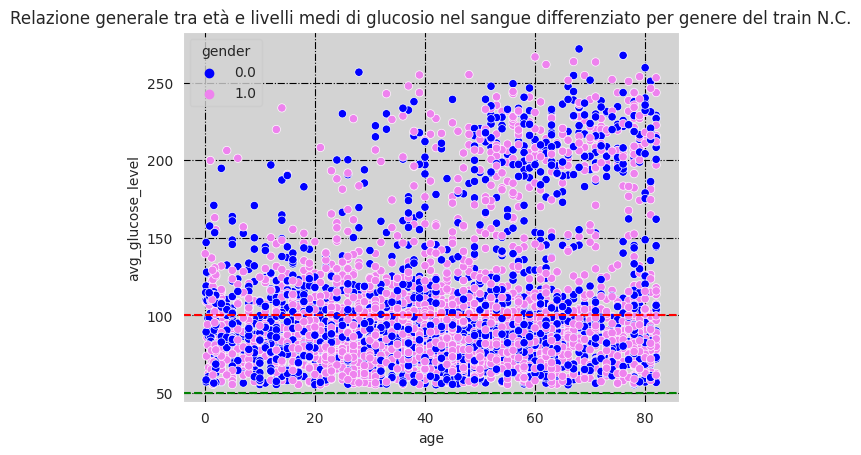

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
sns.scatterplot(data = colonne_rel1, x="age", y="avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del train N.C.")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
#plt.legendplot("Female","Male")
plt.show()

Da una primissima analisi incentrata sulla relazione ***tra età e livelli medi di glucosio***, si nota innanzitutto come i livelli di glucosio elevati siano maggiormente imputabili alle persone di età superiore ai 40 anni. Essendo il livello di glucosio una delle variabili più importanti quando si parla di infarti, non possiamo non tener conto dell'importanza del dato se dobbiamo effettuare un'analisi sui dati degli infarti. Dallo scatterplot si nota facilmente come ci sia una concentrazione maggiore di elevati livelli di glocosio nella fascia di età compresa tra 40 e 80 anni.

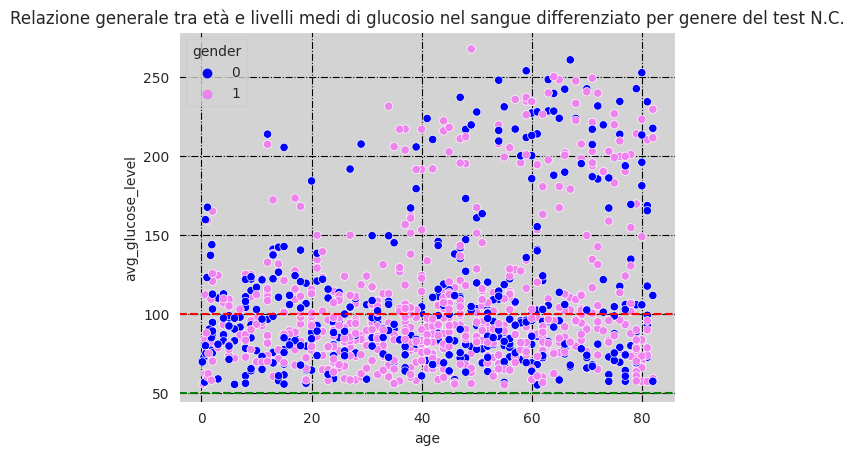

In [ ]:
sns.scatterplot(data = colonne_rel2, x="age", y="avg_glucose_level", hue = "gender", palette = custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del test N.C.")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()

Vediamo che la distribuzione delle variabili all'interno dei due dataset è abbastanza simile, cambiando solo l'intensità, semplicemente perché nel test sono meno i soggetti presenti.

A questo punto, procediamo a cercare delle relazioni delle stesse variabili differenziate però per età dei soggetti presenti.

      gender  avg_glucose_level   age
2       0.00             114.84 13.00
6       0.00              99.71 13.00
8       0.00              71.92  5.00
12      0.00              63.82 17.00
22      1.00              77.87  3.00
...      ...                ...   ...
4052    1.00              95.28  1.80
4058    0.00              68.52  2.00
4063    1.00              61.53  1.48
4064    1.00              64.51 16.00
4065    0.00             115.40  6.00

[679 rows x 3 columns]


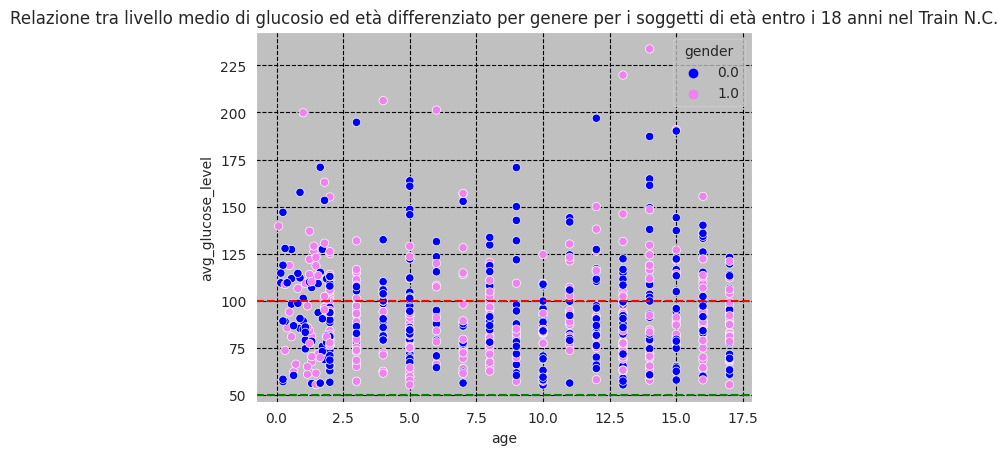

,gender,avg_glucose_level,age
count,679.00,679.00,679.00
mean,0.49,93.81,8.57
std,0.50,26.54,5.42
min,0.00,55.34,0.08
25%,0.00,76.19,3.00
50%,0.00,88.83,8.00
75%,1.00,107.90,14.00
max,1.00,233.71,17.00


In [ ]:
bambini = colonne_rel1[(colonne_rel1["age"] < 18)]
print(bambini)
sns.scatterplot(data = bambini, x = "age", y = "avg_glucose_level", hue ="gender",palette=custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età entro i 18 anni nel Train N.C.")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
bambini.describe()


La maggior parte dei ragazzi/bambini entro i 18 anni di età hanno una media di glucosio nel sangue molto più bassa. Sono pochi i soggetti che superano i 100 e ancor di meno quelli che superano il 150.
Nel grafico sono indicate con una linea verde e una rossa rispettivamente i livelli minimi ottimali di glucosio nel sangue e quelli massimi da non superare.

      gender  avg_glucose_level   age
12         0             107.69  8.00
17         0              96.73 12.00
18         1              85.15  7.00
22         0              91.81  7.00
27         1             115.93 17.00
...      ...                ...   ...
1017       1              90.22  9.00
1021       0              79.89  5.00
1027       1             109.81  4.00
1029       1              88.11  0.88
1030       0             108.06  8.00

[177 rows x 3 columns]


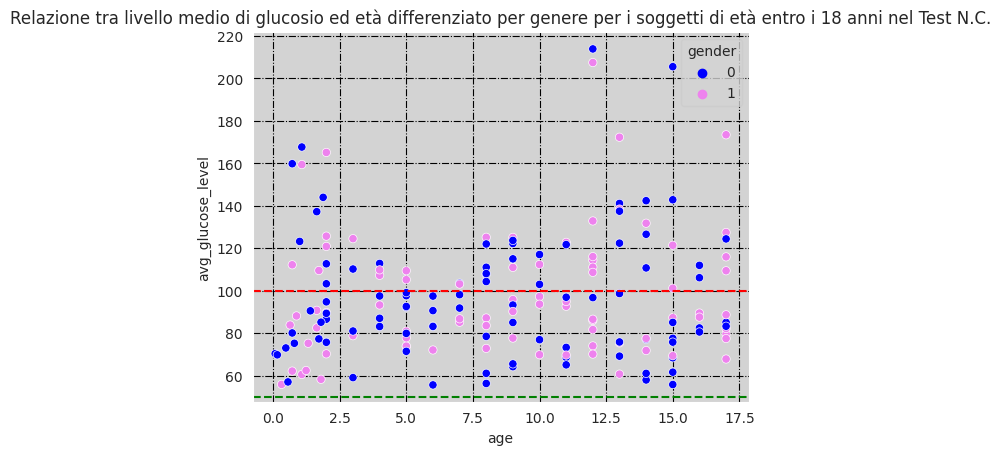

,gender,avg_glucose_level,age
count,177.00,177.00,177.00
mean,0.47,96.61,8.52
std,0.50,29.24,5.27
min,0.00,55.61,0.08
25%,0.00,75.85,4.00
50%,0.00,89.72,9.00
75%,1.00,111.08,13.00
max,1.00,213.87,17.00


In [ ]:
bambini = colonne_rel2[(colonne_rel2["age"] < 18)]
print(bambini)
sns.scatterplot(data = bambini, x = "age", y = "avg_glucose_level", hue ="gender",palette=custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età entro i 18 anni nel Test N.C.")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
bambini.describe()

Invece nella categoria "giovani", ovvero quei soggetti compresi tra i 18 e i 35 anni di età, notiamo come i valori di glucosio siano ampiamente al di sotto della soglia del 100/150. la distribuzione dei valori inferiori al 100 è molto più uniforme, tenendo anche conto del numero maggiore di soggetti che rientrano in questa categoria in confronto ai bambini <18 anni

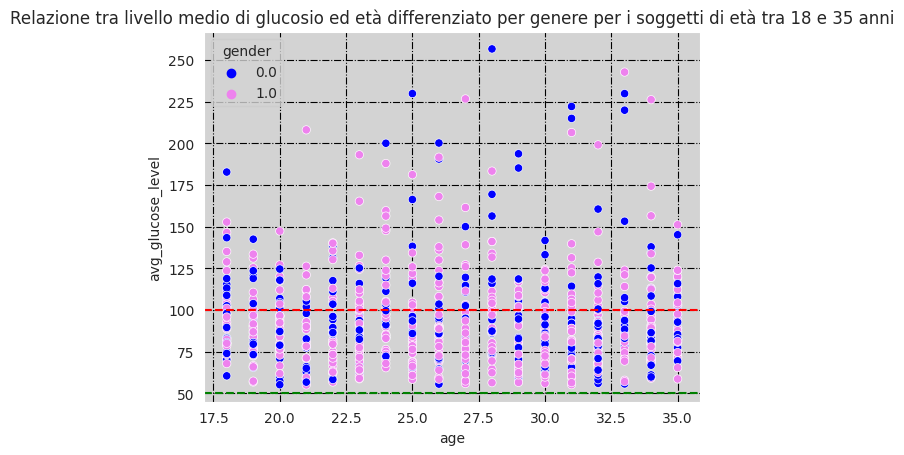

,gender,avg_glucose_level,age
count,838.00,839.00,839.00
mean,0.65,93.79,26.84
std,0.48,29.44,5.22
min,0.00,55.12,18.00
25%,0.00,74.45,23.00
50%,1.00,87.25,27.00
75%,1.00,104.59,31.00
max,1.00,256.74,35.00


In [ ]:
giovani = colonne_rel1[(colonne_rel1["age"] >= 18) & (colonne_rel1["age"] <= 35)]
sns.scatterplot(data = giovani, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 18 e 35 anni")
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
giovani.describe()

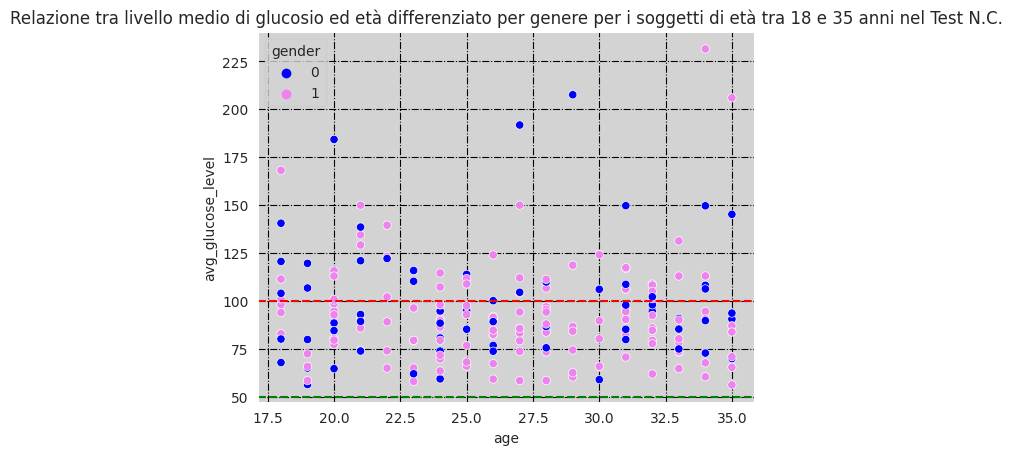

,gender,avg_glucose_level,age
count,204.00,204.00,204.00
mean,0.66,94.41,26.59
std,0.48,27.34,5.11
min,0.00,56.12,18.00
25%,0.00,77.58,22.00
50%,1.00,90.36,27.00
75%,1.00,106.06,31.00
max,1.00,231.50,35.00


In [ ]:
giovani = colonne_rel2[(colonne_rel2["age"] >= 18) & (colonne_rel2["age"] <= 35)]
sns.scatterplot(data = giovani, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 18 e 35 anni nel Test N.C.")
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
giovani.describe()

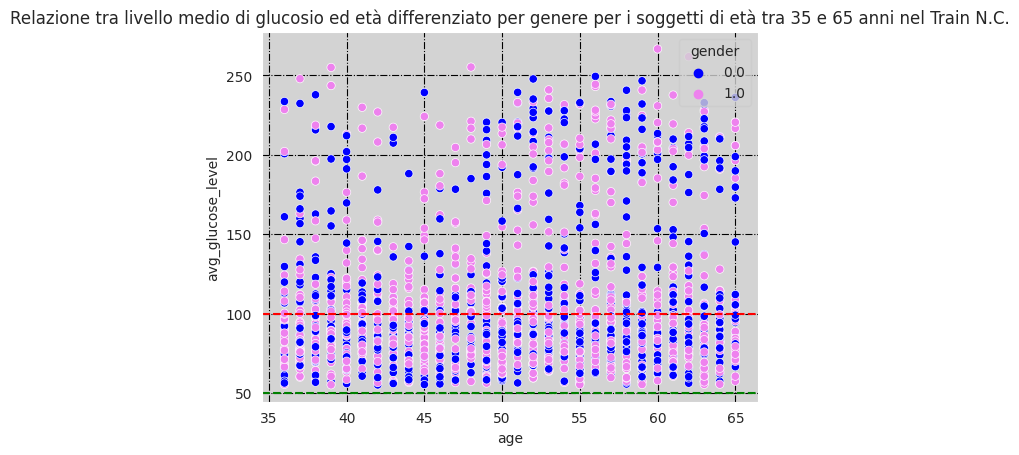

,gender,avg_glucose_level,age
count,1787.00,1787.00,1787.00
mean,0.58,107.98,50.64
std,0.49,46.41,8.33
min,0.00,55.22,36.00
25%,0.00,77.51,44.00
50%,1.00,92.39,51.00
75%,1.00,115.98,57.00
max,1.00,266.59,65.00


In [ ]:
adulti = colonne_rel1[(colonne_rel1["age"] > 35) & (colonne_rel1["age"] <= 65)]
#print(adulti)
sns.scatterplot(data = adulti, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 35 e 65 anni nel Train N.C.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
adulti.describe()

Per quanto riguarda gli adulti il discorso varia leggermente. Notiamo infatti un aumentare dei soggetti con valori di glucosio superiori a 100/150, il che comporta un aumento del rischio di infarto. Ricordiamo sempre che la soglia massima ottimale per i livelli di glucosio nel sangue non dovrebbe superare i 100. Infatti i giovani compresi tra i 18 e 35 anni hanno una media glucosio di 93.79 che rine

Per conludere la prima analisi di rapporto età e livello di glucosio, non ci resta che esaminare i soggetti "anziani", nella fascia di età che va oltre i 65 anni di età. In questo caso, dallo scatterplot notiamo che la distribuzione dei soggetti è molto più omogenea e uniforme tra quelli al di sotto dei 100/150 e quelli al di sopra, esposti quindi al rischio di malattie cardiache.

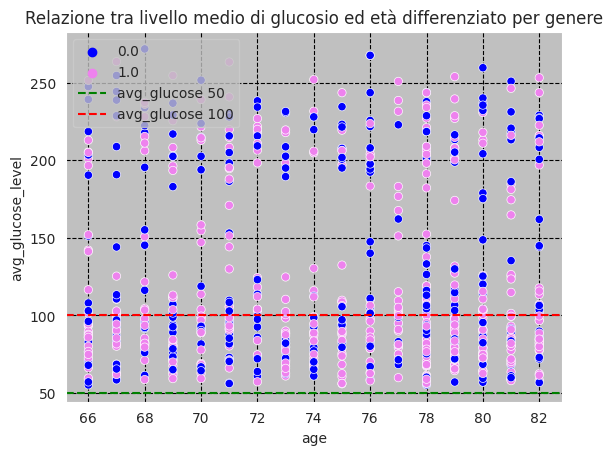

,gender,avg_glucose_level,age
count,774.00,774.00,774.00
mean,0.59,123.59,74.65
std,0.49,59.66,5.00
min,0.00,55.23,66.00
25%,0.00,79.87,70.00
50%,1.00,97.65,75.00
75%,1.00,183.28,79.00
max,1.00,271.74,82.00


In [ ]:
anziani = colonne_rel1[(colonne_rel1["age"] > 65)]
#print(anziani)
sns.scatterplot(data = anziani, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 50')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 100')
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.legend(loc="upper left")
plt.show()
anziani.describe()

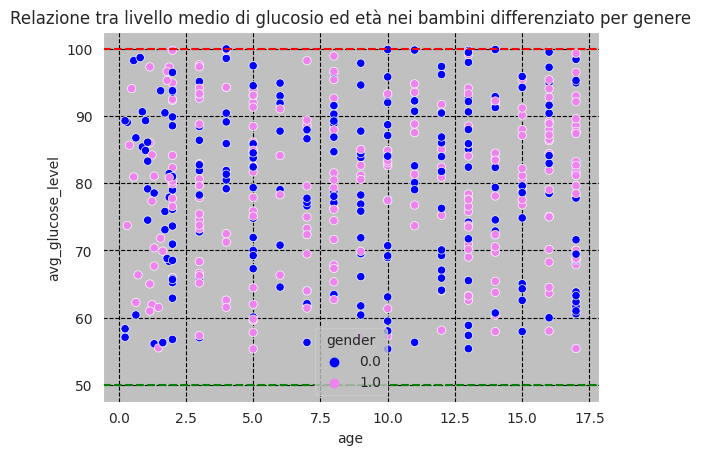

In [ ]:
bambini_basso_glc = colonne_rel1[(colonne_rel1["age"] < 18) & (colonne_rel1["avg_glucose_level"] < 100)]
#bambini_basso_glc.describe()
sns.scatterplot(data = bambini_basso_glc, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione tra livello medio di glucosio ed età nei bambini differenziato per genere")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 50')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 100')
plt.show()

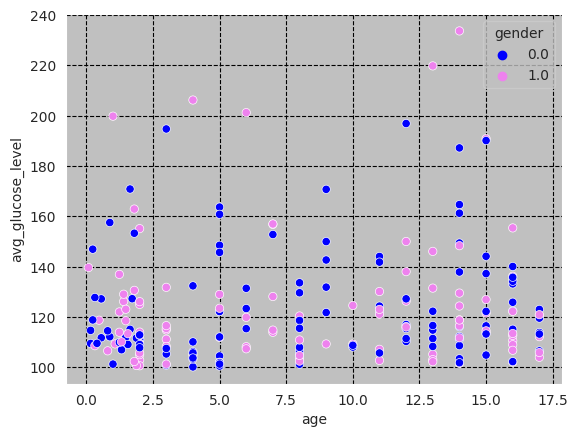

In [ ]:
bambini_alto_glc = colonne_rel1[(colonne_rel1["age"] < 18) & (colonne_rel1["avg_glucose_level"] > 100)]
#bambini_alto_glc.describe()
sns.scatterplot(data = bambini_alto_glc, x ="age", y = "avg_glucose_level", hue = "gender",palette=custom_palette)
plt.show()

A questo punto procedo ad esaminare se ci sono delle relazioni tra BMI, età e ipertensione.

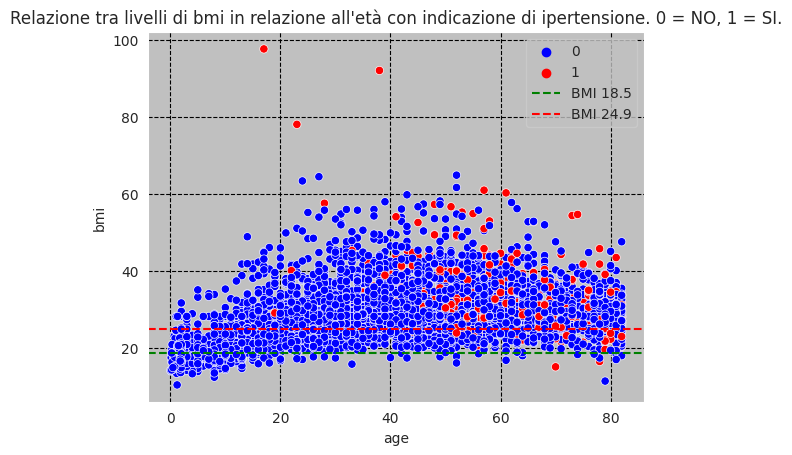

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="hypertension", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend()
plt.show()


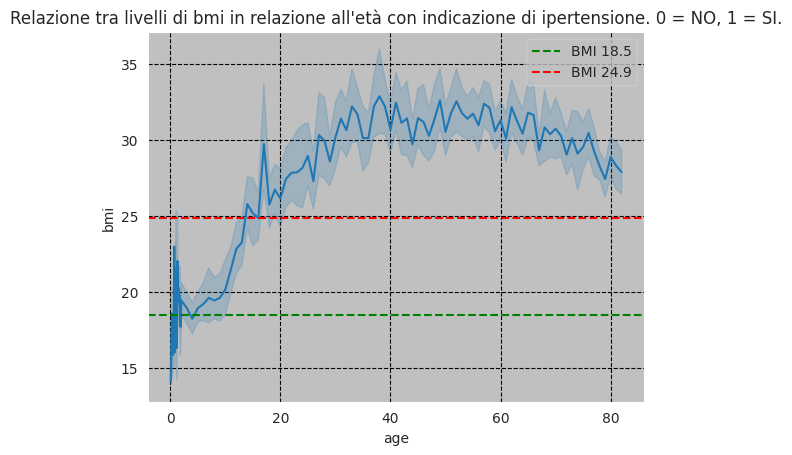

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.lineplot(data=colonne_rel3, x="age", y="bmi")
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend()
plt.show()

Da questo lineplot possiamo notare che la maggior parte dei soggetti presenti nel dataset train NC non soffrono di ipertensione, e quei soggetti invece che ne soffrono sono maggiormente concentrati nella fascia d'età superiore ai 40 anni.\
Tendenzialmente per gli adulti un buon valore BMI è tra 18,5 e 24,9. quindi possiamo facilmente capire, grazie alle due rette che indicano il range ottimale di BMI, che ci sono moltissimi soggetti al di sopra della soglia ottimale di BMI, soprattutto dai 20 anni in poi.

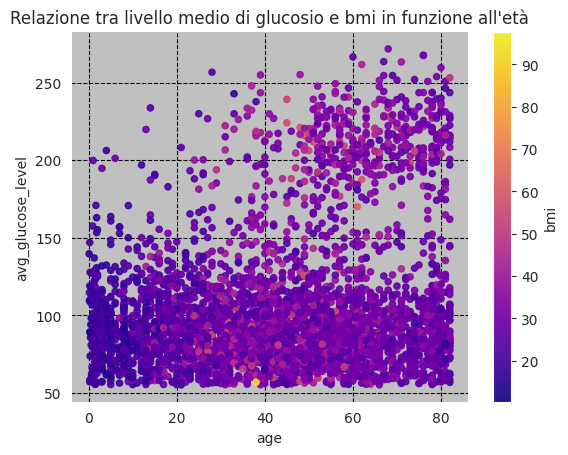

In [ ]:
colonne_rel3.plot(kind='scatter', x='age', y='avg_glucose_level', c = "bmi", s=20, alpha=0.9, cmap= "plasma")
plt.title("Relazione tra livello medio di glucosio e bmi in funzione all'età")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "-."})
plt.gca().spines[['top', 'right',]].set_visible(False)

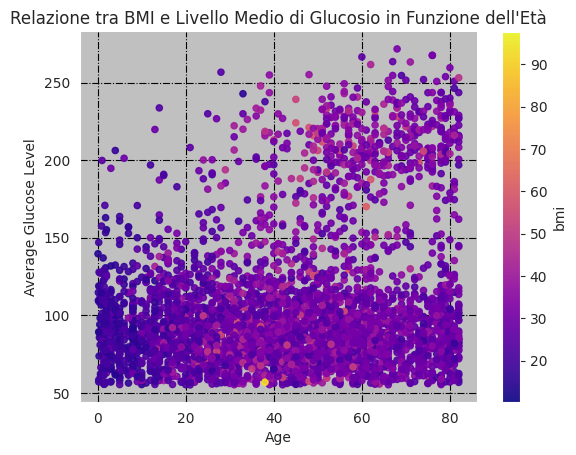

In [ ]:
colonne_rel3.plot(kind='scatter', x='age', y='avg_glucose_level', c="bmi", s=20, alpha=0.9, cmap = "plasma")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title("Relazione tra BMI e Livello Medio di Glucosio in Funzione dell'Età")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.show()


Dall'analisi di questi grafici si possono iniziare a tirare le prime somme, affermando che all'aumentare dell'età aumentano sia i valori medi di glucosio nel sangue, sia le possibilità di ipertensione.\
Un fattore che non viene particolarmente influenzato dall'età è il valore BMI che ha una distribuzione abbastanza omogenea su tutto il set, escludendo ovviamente giovani e giovanissimi che rientrano entro i 18 anni di età.

A questo punto non ci resta che valutare la relazione tra bmi, età, ipertensione e stroke.

In [ ]:
colonne_rel5 = train_nc[["hypertension", "stroke"]]
colonne_rel5

,hypertension,stroke
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4074,0,0
4075,0,0
4076,0,0
4077,0,1


from matplotlib import pyplot as plt
_df_0['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['stroke'].plot(kind='hist', bins=20, title='stroke')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='hypertension', y='stroke', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['hypertension'].plot(kind='line', figsize=(8, 4), title='hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['stroke'].plot(kind='line', figsize=(8, 4), title='stroke')
plt.gca().spines[['top', 'right']].set_visible(False)

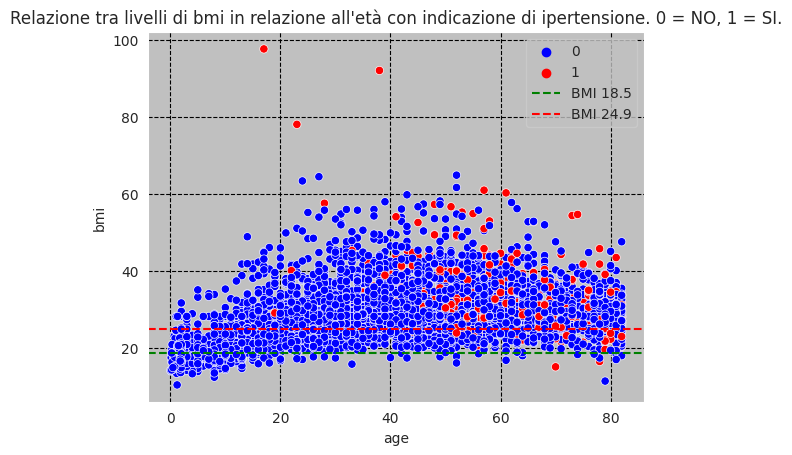

In [ ]:
colonne_rel5 = train_nc[["gender", "bmi", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="hypertension", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend()
plt.show()


Analizzeremo ora il collegamento tra ipertensione e possibilità di avere un infarto:

# Fase 3

In [ ]:
colonne_rel5 = train_nc[["gender", "bmi", "age", "hypertension", "stroke"]]
#test_pivot = train_nc.pivot_table(index="hypertension", columns="age", values="stroke", aggfunc='mean')
#print(test_pivot)
print(colonne_rel5)


      gender   bmi   age  hypertension  stroke
0       1.00 26.10 29.00             0       0
1       1.00 28.10 79.00             0       0
2       0.00 18.30 13.00             0       0
3       0.00 28.70 63.00             0       0
4       1.00 32.70 22.00             0       0
...      ...   ...   ...           ...     ...
4074    1.00 27.40 51.00             0       0
4075    1.00 23.00 18.00             0       0
4076    1.00 50.50 35.00             0       0
4077    1.00 16.90 81.00             0       1
4078    1.00 35.40 26.00             0       0

[4078 rows x 5 columns]


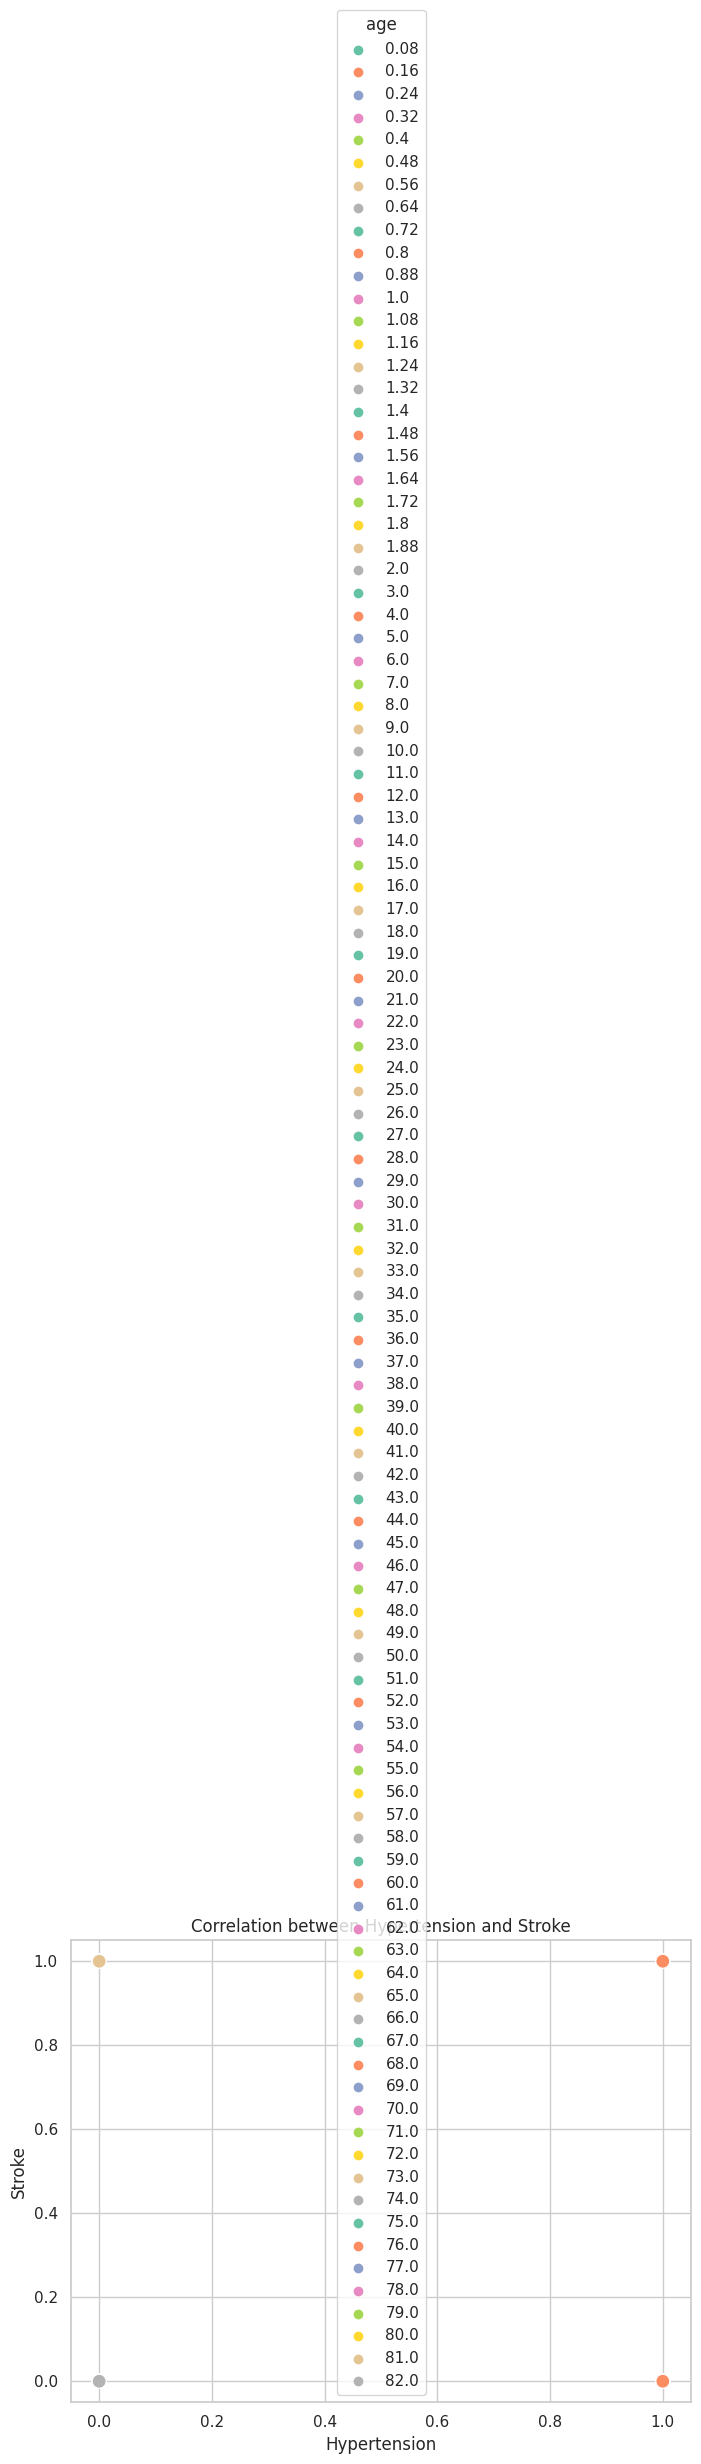

In [ ]:
df = pd.DataFrame(colonne_rel5)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.scatterplot(x='hypertension', y='stroke', hue='age', data=df, palette='Set2', s=100)

plt.xlabel('Hypertension')
plt.ylabel('Stroke')
plt.title('Correlation between Hypertension and Stroke')

plt.show()

# Conclusioni

QUI INSERIREMO IL REPORT FINALE DELL'ANALISI. UN BEL TESTO CORREDATO DA DATI E QUANT'ALTRO
